## Regresion lineal

## Esteban triana aldana

In [229]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [231]:
#cargamos la base de datos
ruta_archivo = ('car data.csv')
df = pd.read_csv(ruta_archivo)


## analisis exploratorio 

In [233]:
#visualizamos la base de datos
df.head(20)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [235]:
# Información general del dataset
df.info()

# Descripción estadística
df.describe()

# Verificar si hay valores faltantes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [237]:
# Descripción estadística
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [245]:
# revisamos los tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Procesamiento de datos

In [270]:
# verificamos valores en 0
print(df['Year'].isin([0]).sum())
print(df['Selling_Price'].isin([0]).sum())
print(df['Present_Price'].isin([0]).sum())
print(df['Kms_Driven'].isin([0]).sum())
print(df['Fuel_Type'].isin([0]).sum())
print(df['Seller_Type'].isin([0]).sum())
print(df['Transmission'].isin([0]).sum())
print(df['Owner'].isin([0]).sum())

0
0
0
0
0
0
0
0


In [272]:
#Reemplazamos valores
df['Owner'].replace(0, 1, inplace=True)

# Verificar que se hayan reemplazado los valores 0


C:\Users\tardy\AppData\Local\Temp\ipykernel_6116\491347188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Owner'].replace(0, 1, inplace=True)


In [274]:
# Verificar si hay valores faltantes
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [276]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,1
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,1
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,1
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,1
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,1
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,1


## seleccion de caracteristicas mas relevantes

In [249]:
# Definir X y Y
X = df[['Year', 'Present_Price', 'Kms_Driven']]
y = df['Selling_Price']

## dividir el dataset en train y test

In [251]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el modelo

In [253]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, Y_train)

# Predecir los valores de la prueba
Y_pred = model.predict(X_test)

## calculamos el error cuadratico y coeficiente de determinacion

In [255]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R2): {r2}")


Error Cuadrático Medio: 4.010554030280745
Coeficiente de Determinación (R2): 0.8258974489339239


## graficamos regresion lineal

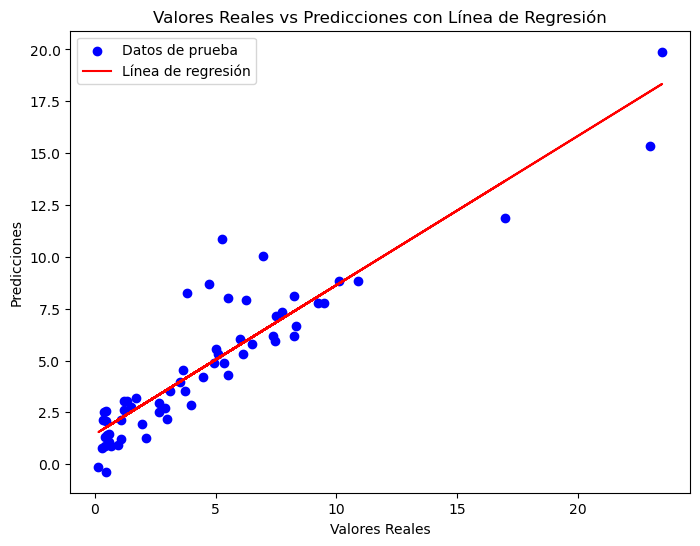

In [257]:
plt.figure(figsize=(8,6))

# Gráfico de dispersión: valores reales vs predicciones
plt.scatter(Y_test, Y_pred, color='blue', label='Datos de prueba')

# Crear la línea de regresión (la línea perfecta de ajuste 1:1)
reg_line = np.poly1d(np.polyfit(Y_test, Y_pred, 1))

# Dibujar la línea de regresión en el gráfico
plt.plot(Y_test, reg_line(Y_test), color='red', label='Línea de regresión')

# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones con Línea de Regresión")
plt.legend()


## realizamos diferentes graficas entre variables

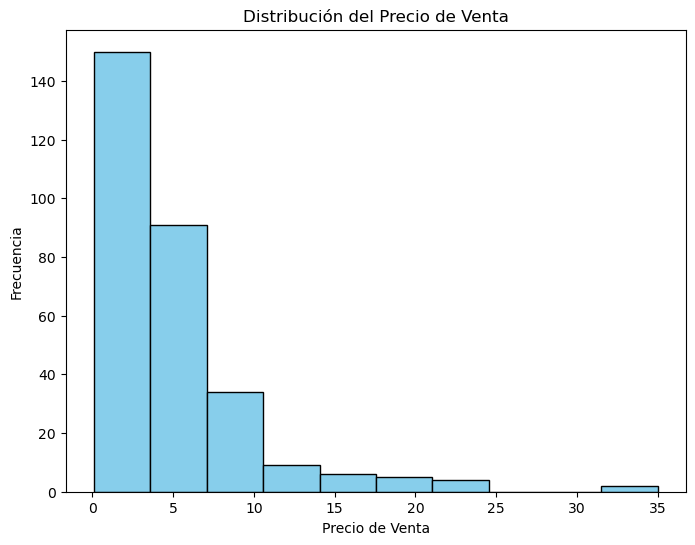

In [259]:

# Histograma: Distribución de los precios de venta
plt.figure(figsize=(8,6))
plt.hist(df['Selling_Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

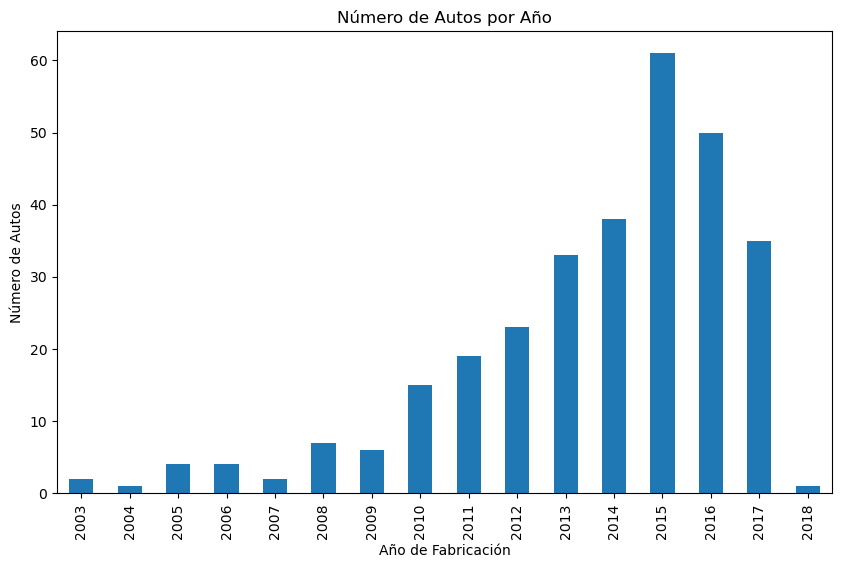

In [261]:
# Diagrama de barras: Número de autos por año
plt.figure(figsize=(10,6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de Autos por Año')
plt.xlabel('Año de Fabricación')
plt.ylabel('Número de Autos')
plt.show()

<Figure size 700x700 with 0 Axes>

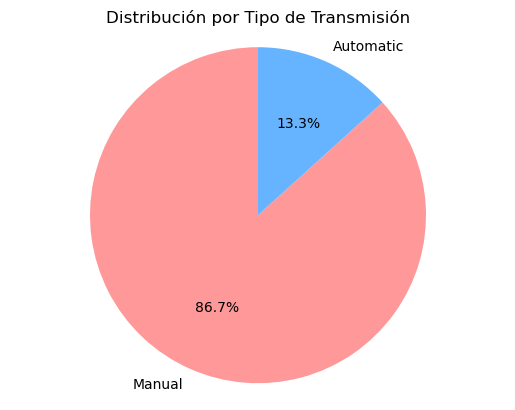

In [263]:
# Diagrama circular: Distribución de autos por tipo de transmisión
plt.figure(figsize=(7,7))
transmission_counts = df['Transmission'].value_counts()

# Crear el gráfico circular
fig, ax = plt.subplots()
ax.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Asegurar que el gráfico sea circular
ax.axis('equal')
plt.title('Distribución por Tipo de Transmisión')
plt.show()

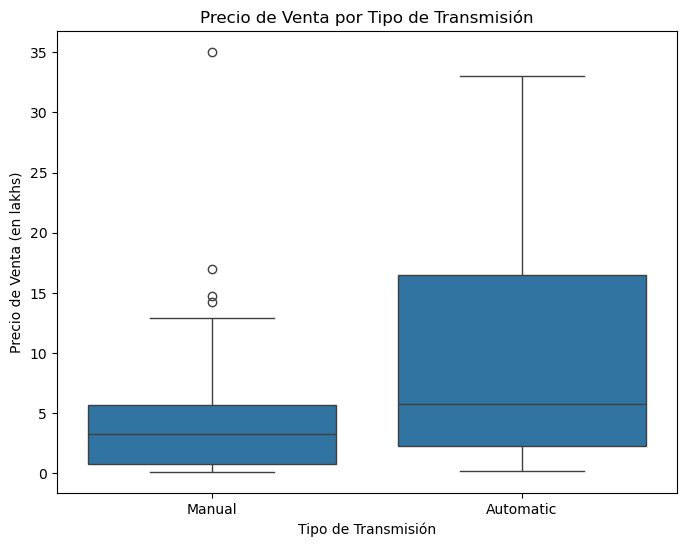

In [265]:
# Boxplot: Precio de venta por tipo de transmisión
plt.figure(figsize=(8,6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Precio de Venta por Tipo de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Precio de Venta (en lakhs)')
plt.show()

## Interpretacion de resultados

el histograma tiene una distribución sesgada a la izquierda indica que la mayoría de los automóviles en el conjunto de datos se venden a precios más bajos.

el diagrama de barras indica que la mayoria autos fueron fabricados desde el 2010 al 2017


In [ ]:
el diagrama circula indica que la distribucion por transmision de los vehiculo

en la grafica de de dispersion lineal , la dispersión de algunos puntos alejados de la línea de regresión muestra que el modelo podría mejorar en ciertos casos, probablemente en predicciones de autos con precios muy altos.
El modelo de regresión lineal tiene un rendimiento razonablemente bueno, ya que el R² de 0.826 indica que el modelo captura la mayoría de las relaciones entre los atributos del automóvil y el precio de venta.